# The Temperature Chronicles: A Tale of Two Thermometers

In the final days before Earth's great catastrophe, Emma and Jack shared an oddly specific hobby: recording temperatures outside their cottage every day at noon. Emma, devoted to her grandmother's Celsius thermometer, and Jack, loyal to his antique Fahrenheit device, kept meticulous daily records, each in their own journal.

When an asteroid struck in 2525, most of human knowledge was lost to time, including the relationship between temperature scales. Three thousand years later, Dr. Lyra, an archaeologist from Andromeda, discovered their perfectly preserved logs in a radiation-proof vault. Five years of parallel temperature readings, two different scales, and one fascinating puzzle.

Despite the slight noise in their measurements (their thermometers weren't perfect, after all), Dr. Lyra suspected a linear relationship between these ancient scales. Join us as we use deep learning to uncover this lost piece of human knowledge!

In [8]:
%pip install -q tensorweaver matplotlib==3.10.1

Note: you may need to restart the kernel to use updated packages.


In [9]:
# import necessary libraries
# *NOTE*: tensorweaver is compatible with pytorch API, so you can use it as a drop-in replacement for pytorch
import tensorweaver as torch # OR import torch
import matplotlib.pyplot as plt

# import our lovely dataset
from tensorweaver.toy_datasets.get_celsius_fahrenheit_dataset import (
    get_celsius_fahrenheit_dataset,
)

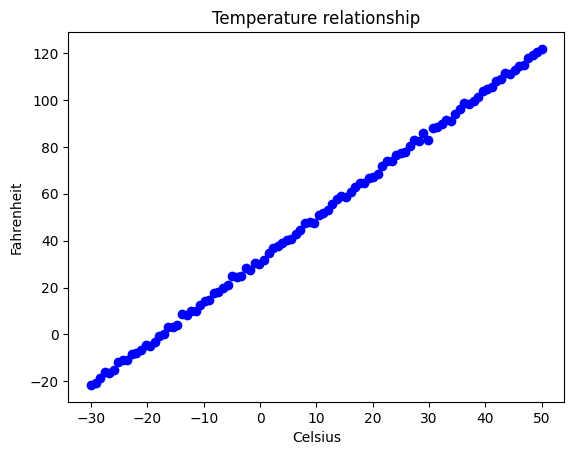

In [10]:
# load the dataset
x_array, y_array = get_celsius_fahrenheit_dataset()


# plot the dataset
plt.scatter(x_array, y_array, color='blue', marker="o")
plt.title("Temperature relationship")
plt.xlabel("Celsius")
plt.ylabel("Fahrenheit")
plt.show()

In [11]:
# define our model, a simple linear regression model
class LinearRegressionModel(torch.nn.Module):

    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(1, 1)  # One in and one out

    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred


# create our model
our_model = LinearRegressionModel()

# convert the dataset to tensors
x = torch.tensor(x_array)  # temperature in celsius
y = torch.tensor(y_array)  # temperature in fahrenheit

# define our loss function and optimizer
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(our_model.parameters(), lr=0.0015)

# train our model
loss_path = []

for epoch in range(10000):
    # Forward pass: Compute predicted y by passing
    # x to the model
    pred_y = our_model(x)

    # Compute and print loss
    loss = criterion(pred_y, y)

    # Zero gradients, perform a backward pass,
    # and update the weights.
    optimizer.zero_grad()
    loss_path.append(loss.item())
    loss.backward()
    optimizer.step()

    if epoch % 1000 == 0:
        print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss 6377.877543604177
epoch 1000, loss 6.173105424446716
epoch 2000, loss 0.848442959919711
epoch 3000, loss 0.8151142684945353
epoch 4000, loss 0.8149056540181226
epoch 5000, loss 0.8149043482362899
epoch 6000, loss 0.8149043400630022
epoch 7000, loss 0.8149043400118415
epoch 8000, loss 0.8149043400115233
epoch 9000, loss 0.8149043400115206


In [12]:
# It's time to see the results!
print("Ground true relationship: °F = 1.8*°C + 32")
print(f"Our model: °F = {our_model.linear.weight.item():.4f}*°C + {our_model.linear.bias.item():.4f}")

Ground true relationship: °F = 1.8*°C + 32
Our model: °F = 1.8017*°C + 31.8789


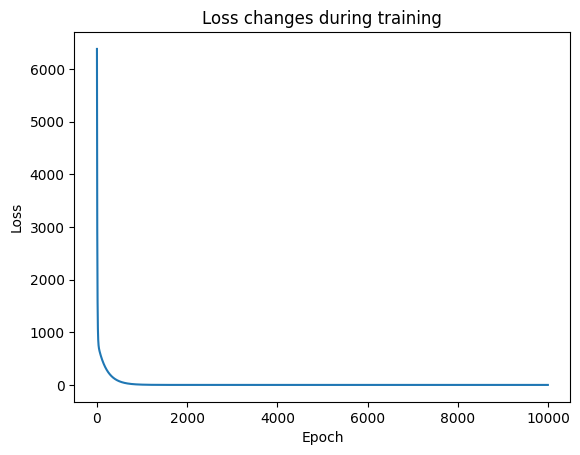

In [13]:
# plot the loss path, to see how the model is learning
plt.plot(loss_path)
plt.title("Loss changes during training")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

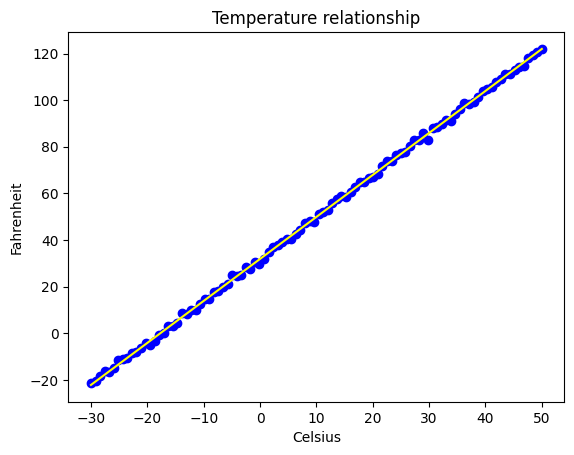

In [14]:
# plot the data with the model prediction line
plt.scatter(x_array, y_array, color='blue', marker="o")
plt.plot(x_array, our_model(x).detach().numpy(), color='yellow')
plt.title("Temperature relationship")
plt.xlabel("Celsius")
plt.ylabel("Fahrenheit")
plt.show()

# The Results: A Remarkable Discovery

After running her neural network through thousands of iterations, Dr. Lyra's eyes widened with excitement. The relationship she discovered was astonishingly close to the original Celsius-to-Fahrenheit conversion formula that humanity had lost:

Her model suggested: °F = 1.8017*°C + 31.8789
The actual historical formula was: °F = 1.8*°C + 32

The accuracy was remarkable - the neural network had rediscovered the lost mathematical relationship with an error of less than 0.4%! Dr. Lyra couldn't help but smile, thinking about Emma and Jack's meticulous daily recordings that had preserved this crucial piece of human knowledge through millennia.

This simple yet elegant demonstration shows us how neural networks can learn patterns from data, and more importantly, how we can understand their inner workings step by step. Just as Emma and Jack's temperature recordings bridged different measurement systems, TensorWeaver helps bridge the gap between complex deep learning concepts and our understanding of them.